# Setup

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd

tf.__version__

'2.3.0'

In [3]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('./data_labels_mainData.csv')

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data_big, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data_big.shape[0], val_data_big.shape[0], test_data_big.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


In [4]:
# cellType needs to be string
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

<ipython-input-4-c8097c89ef5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cellType'] = train_data['cellType'].astype('str')
<ipython-input-4-c8097c89ef5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['cellType'] = val_data['cellType'].astype('str')


In [5]:
# learning curve function
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

# Hog feature

(-0.5, 26.5, 26.5, -0.5)

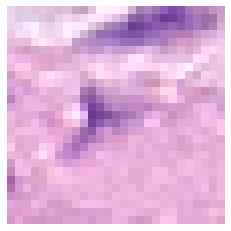

In [31]:
from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread
from skimage.color import rgba2rgb, rgb2gray
from skimage.filters import gaussian

image = imread('./patch_images/3.png')

# Plot image
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')

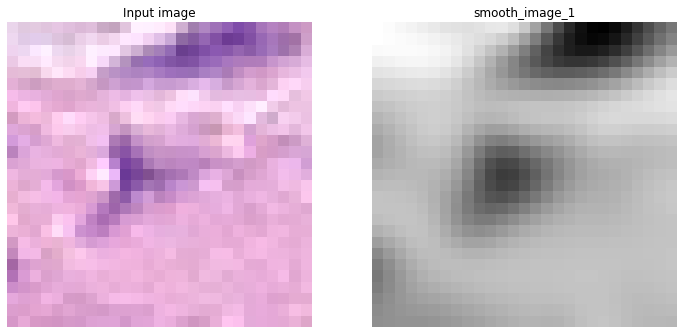

In [48]:
from skimage import filters
grayscale = rgb2gray(image)
smooth_image_1 = gaussian(grayscale, sigma=2)
edge_sobel_v = filters.sobel_v(smooth_image_1)
edge_sobel_h = filters.sobel_h(smooth_image_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(smooth_image_1, cmap=plt.cm.gray)
ax2.set_title('smooth_image_1')
plt.show()


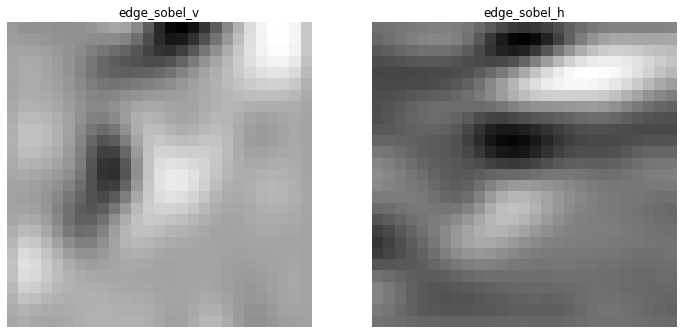

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(edge_sobel_v, cmap=plt.cm.gray)
ax1.set_title('edge_sobel_v')

ax2.axis('off')
ax2.imshow(edge_sobel_h, cmap=plt.cm.gray)
ax2.set_title('edge_sobel_h')
plt.show()

In [50]:
print("Image Shape: ", image.shape, "Flattened shape : ", np.prod(image.shape))
print("grayscale Shape: ", grayscale.shape, "grayscale shape : ", np.prod(grayscale.shape))
print("edge_sobel_v Shape: ", edge_sobel_v.shape, "edge_sobel_v shape : ", np.prod(edge_sobel_v.shape))
print("edge_sobel_h Shape: ", edge_sobel_h.shape, "edge_sobel_h shape : ", np.prod(edge_sobel_h.shape))

Image Shape:  (27, 27, 3) Flattened shape :  2187
grayscale Shape:  (27, 27) grayscale shape :  729
edge_sobel_v Shape:  (27, 27) edge_sobel_v shape :  729
edge_sobel_h Shape:  (27, 27) edge_sobel_h shape :  729
